<a href="https://colab.research.google.com/github/khushboogupta13/Basic-ML-Algorithms/blob/master/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

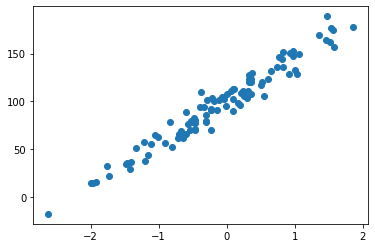

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
bias=100
x,y,coef = make_regression(n_features=1,n_samples=100,coef=True,bias=100,noise=10,random_state=42)
plt.scatter(x,y)


In [13]:
coef


array(97.28780712)

In [43]:
y_gen = x*coef + bias

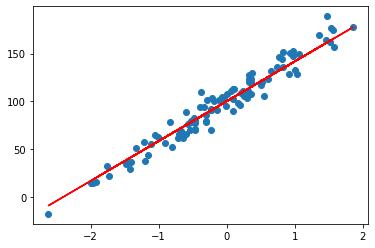

In [44]:
plt.scatter(x,y)
plt.plot(x,y_gen,'r')

In [45]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression?

In [46]:
model = LinearRegression()

In [47]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
model.coef_, model.intercept_

(array([44.43716999]), 101.16511532052698)

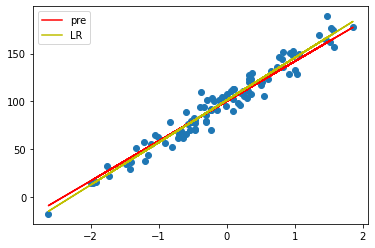

In [49]:
plt.scatter(x,y)
plt.plot(x,y_gen,'r',label = 'pre')
plt.plot(x,model.predict(x),'y',label="LR")
plt.legend()

In [50]:
class CustomLinearRegression:
  def __init__(self,lr=0.1):
    self.lr = lr

  def fit(self,x,y):
    self._x = x #behaves like private 
    self._y = y.reshape(-1,1)

    #to choose random slope and intercept
    self.coef_ = np.random.random()
    self.intercept_ = np.random.random()

    #to perform gradient descent
    errors = []
    for i in range(100):
      self.gradient_descent()
      errors.append(self.error())
    return errors

  def gradient_descent(self):
    #change in coef and intercept
    d_coef, d_intercept = self.gradient()
    self.coef_ -= d_coef*self.lr
    self.intercept_ -= d_intercept*self.lr

  def gradient(self):
    yh = self.predict(self._x)
    d_coef = ((yh - self._y)*(self._x)).mean()
    d_intercept = (yh - self._y).mean()
    return d_coef,d_intercept

  def predict(self,x):
    return x*self.coef_ + self.intercept_

  def error(self):
    return (self.predict((self._x-self._y)**2)).sum()

In [69]:
model = CustomLinearRegression(lr=0.1)
errors = model.fit(x,y)
model.coef_,model.intercept_

(44.41497301104197, 101.15346616383177)

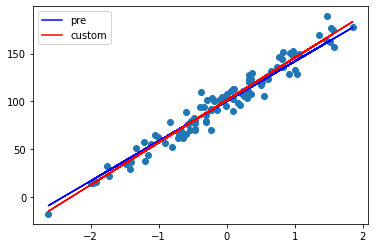

In [70]:
plt.scatter(x,y)
plt.plot(x,y_gen,'b',label = 'pre')
plt.plot(x,model.predict(x),'r',label='custom')
plt.legend()

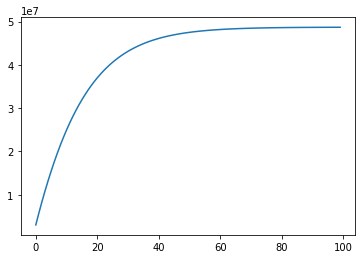

In [71]:
plt.plot(errors)

In [72]:
model.error()

48692102.37320461